# 📊 EDA: Ad Click Prediction

Welcome to the Exploratory Data Analysis (EDA) notebook for the **Ad Click Prediction** ML scenario.  
This notebook explores a simulated dataset of online ad impressions, where the goal is to predict whether a user will click an ad.

---

**🎯 Objective:**  
Predict if a user will click an ad (`clicked`) based on features like demographics, device, campaign, and behavior.

📁 **Dataset:** `EDA_AdClick_Dataset.csv`  
📈 **Target Variable:** `clicked`  
🔢 **Problem Type:** Binary Classification  


## 📥 Step 1: Load Dataset

In [22]:

import pandas as pd

# Load dataset
df = pd.read_csv("EDA_AdClick_Dataset.csv")

# Convert dates
df['impression_date'] = pd.to_datetime(df['impression_date'])

# Display preview
df.head()


,user_id,age,gender,location,device_type,browser,campaign_id,ad_platform,ad_type,impression_date,clicked,time_spent_on_page,num_ads_seen_today,previous_clicks,campaign_budget,category
0,user_861,21,Other,India,Desktop,Safari,camp_109,LinkedIn,Carousel,2023-01-30 03:00:00,0,4.44,7,0,9856.15,Travel
1,user_1295,23,Other,Brazil,Tablet,Firefox,camp_171,Google,Banner,2023-01-04 13:00:00,0,9.64,8,2,12015.31,Travel
2,user_1131,31,Female,India,Mobile,Edge,camp_162,Google,Banner,2022-12-18 11:00:00,0,14.03,2,1,10611.26,Finance
3,user_1096,21,Male,Brazil,Mobile,Firefox,camp_135,Google,Banner,2023-01-15 23:00:00,0,15.30,6,2,10233.56,Electronics
4,user_1639,43,Male,Brazil,Mobile,Safari,camp_195,Facebook,Carousel,2022-12-05 10:00:00,0,9.74,5,3,12677.12,Finance


## 🧾 Step 2: Dataset Overview

In [23]:

print("Shape:", df.shape)
print("\nInfo:")
df.info()

# Summary statistics
df.describe(include='all').T


Shape: (10000, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   age                 10000 non-null  int64         
 2   gender              10000 non-null  object        
 3   location            10000 non-null  object        
 4   device_type         10000 non-null  object        
 5   browser             10000 non-null  object        
 6   campaign_id         10000 non-null  object        
 7   ad_platform         10000 non-null  object        
 8   ad_type             10000 non-null  object        
 9   impression_date     10000 non-null  datetime64[ns]
 10  clicked             10000 non-null  int64         
 11  time_spent_on_page  10000 non-null  float64       
 12  num_ads_seen_today  10000 non-null  int64         
 13  previous_clicks     1

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
user_id,10000,2889,user_2687,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,40.7334,18.0,29.0,40.0,52.0,64.0,13.490965
gender,10000,3,Other,3388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,10000,7,France,1551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_type,10000,3,Mobile,6018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
browser,10000,5,Opera,2055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign_id,10000,100,camp_120,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_platform,10000,4,Twitter,2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_type,10000,3,Video,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
impression_date,10000,NaN,NaN,NaN,2022-07-30 10:24:52.200000,2022-01-01 00:00:00,2022-04-18 00:45:00,2022-07-31 22:30:00,2022-11-11 05:00:00,2023-02-21 15:00:00,NaN


## 📊 Step 3: Univariate Analysis

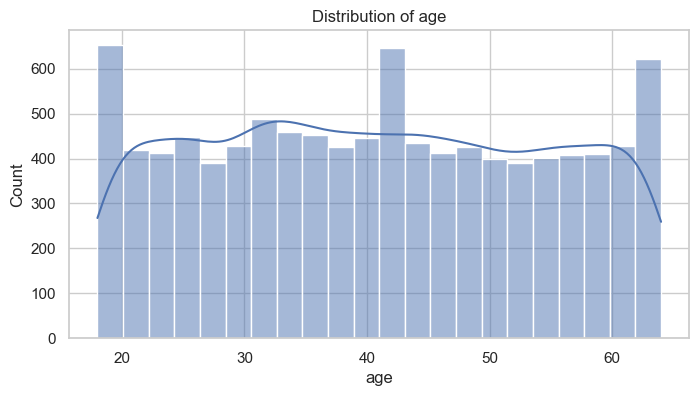

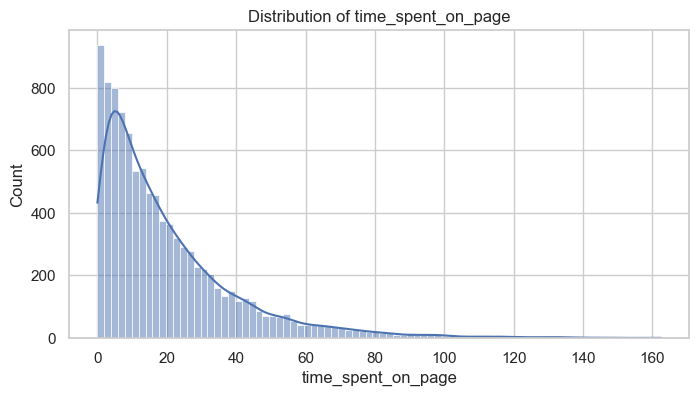

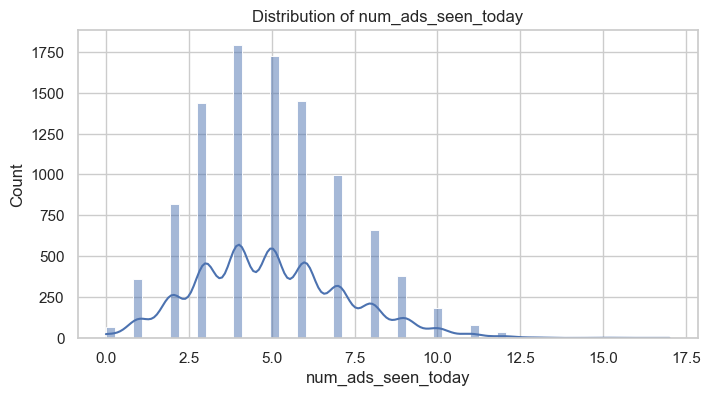

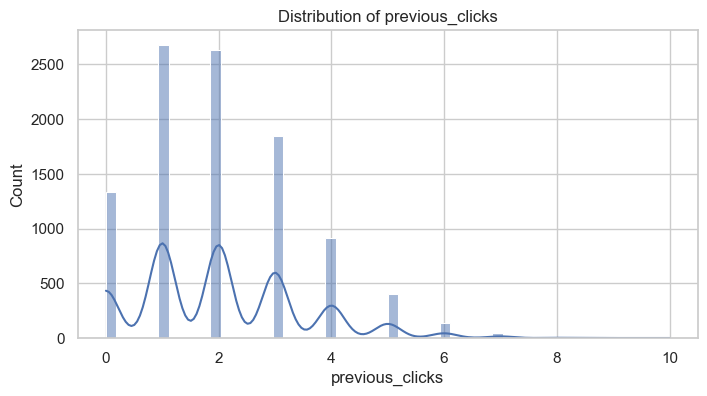

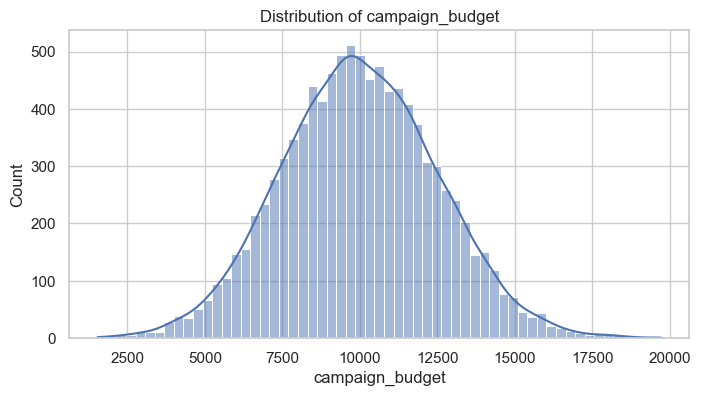

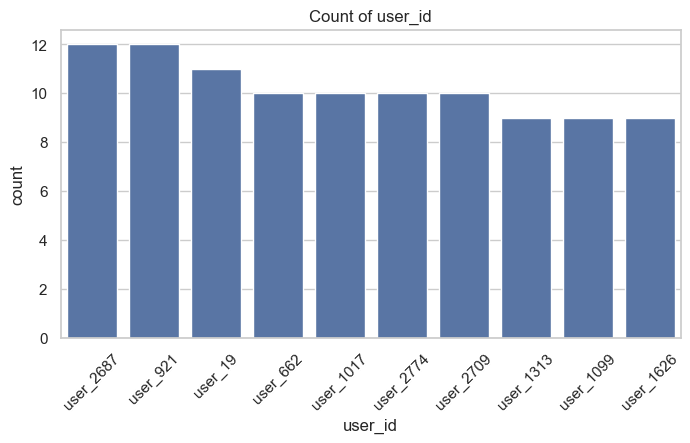

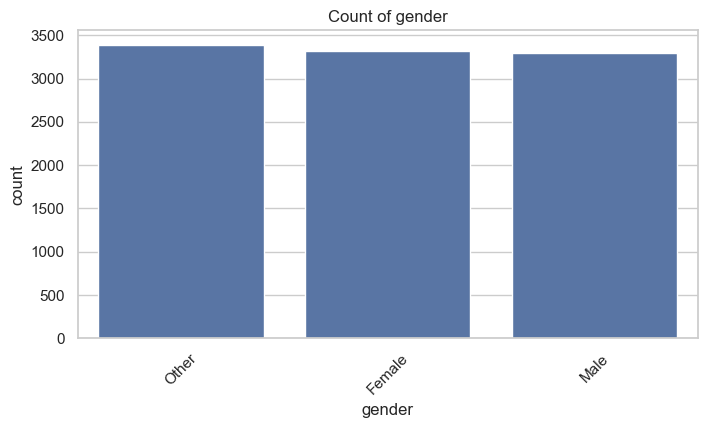

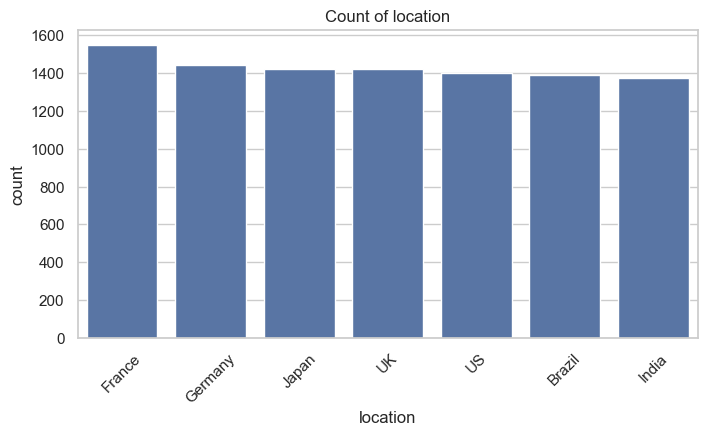

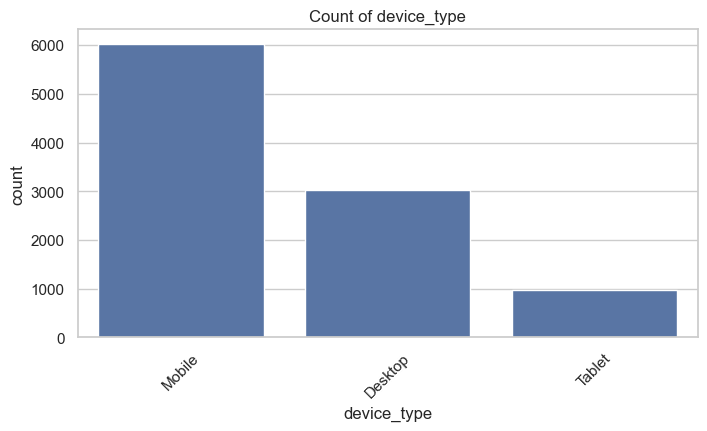

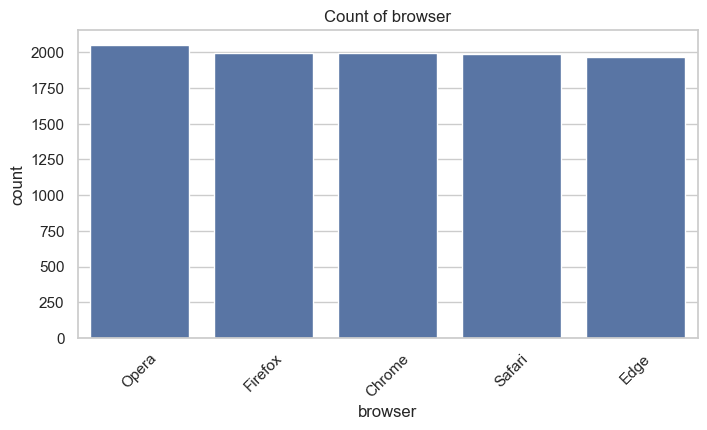

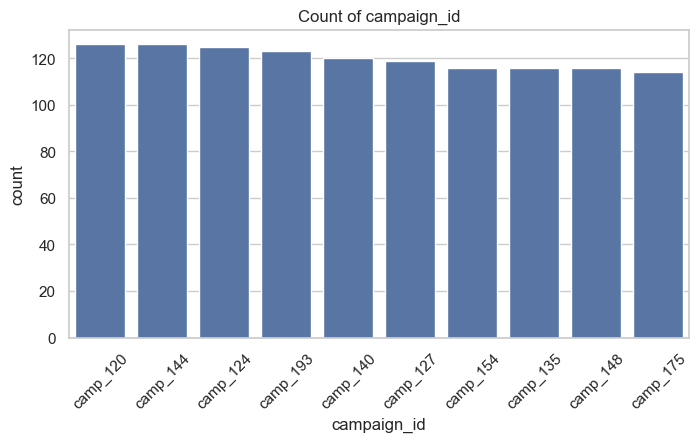

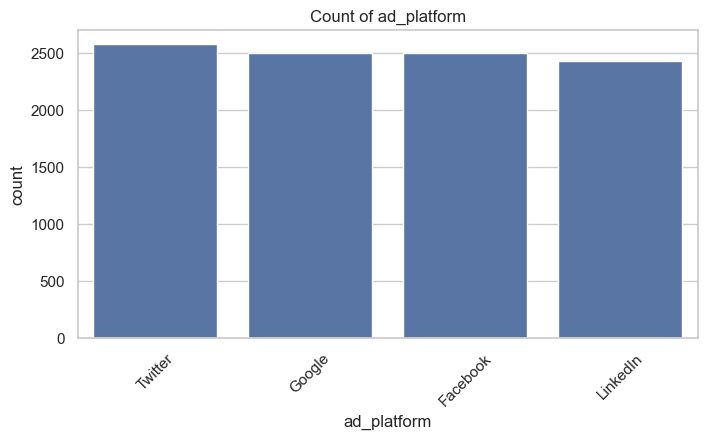

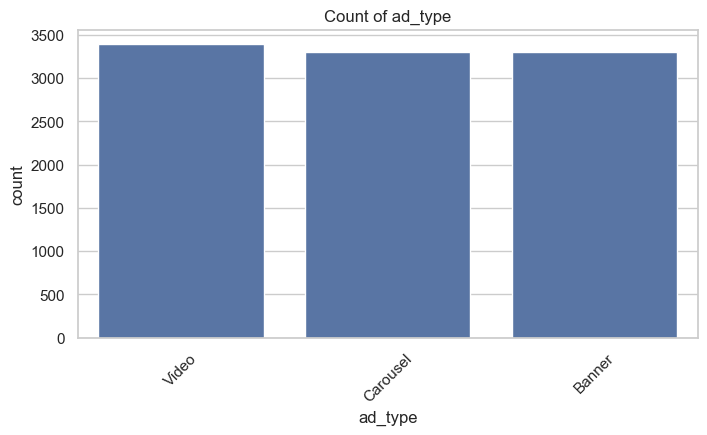

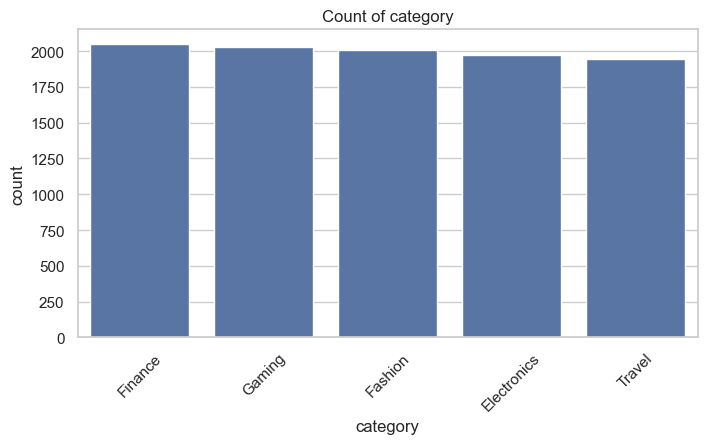

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('clicked')
categorical_cols = df.select_dtypes(include='object').columns

# Numerical: Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical: Countplots
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()


## 📉 Step 4: Bivariate Analysis

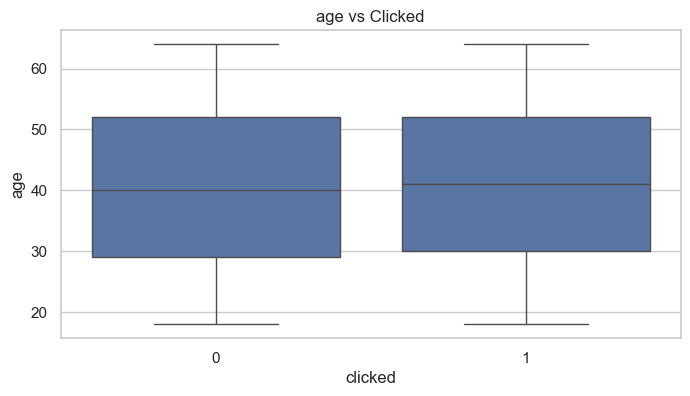

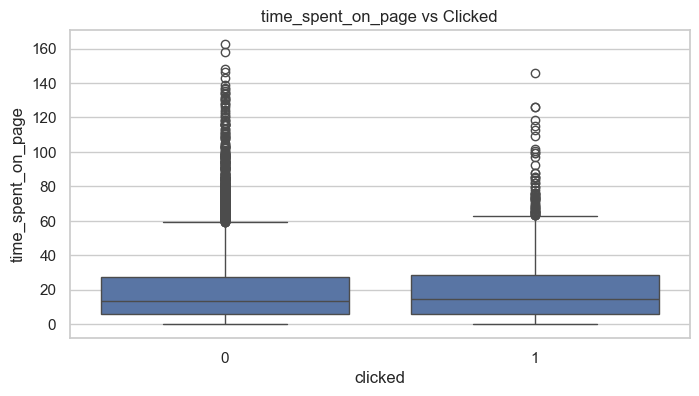

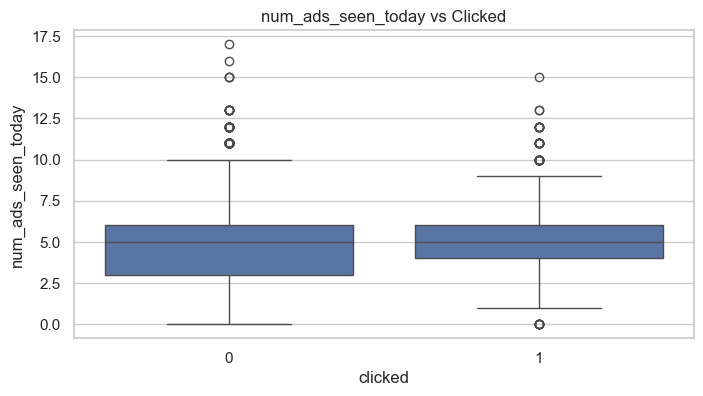

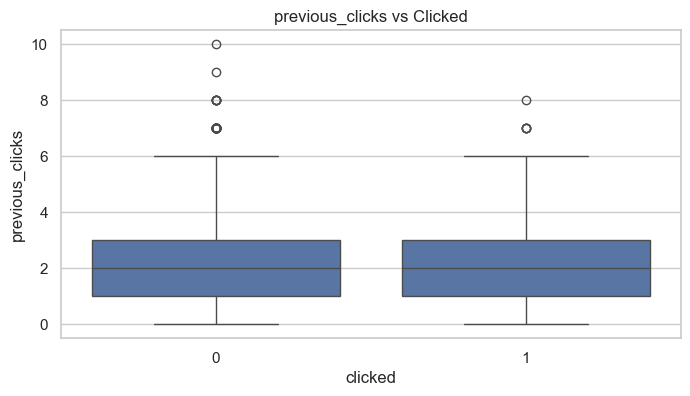

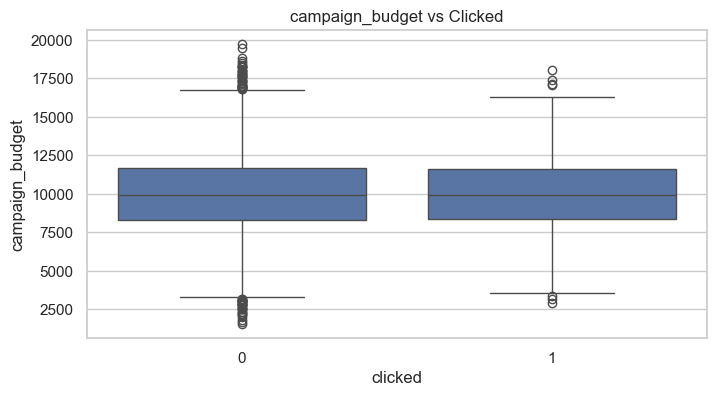

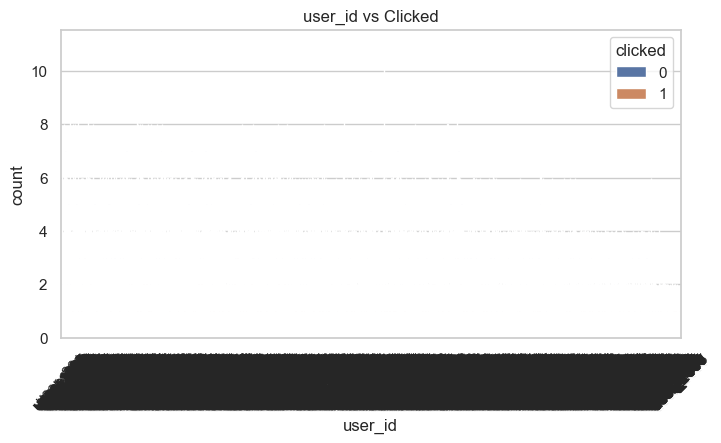

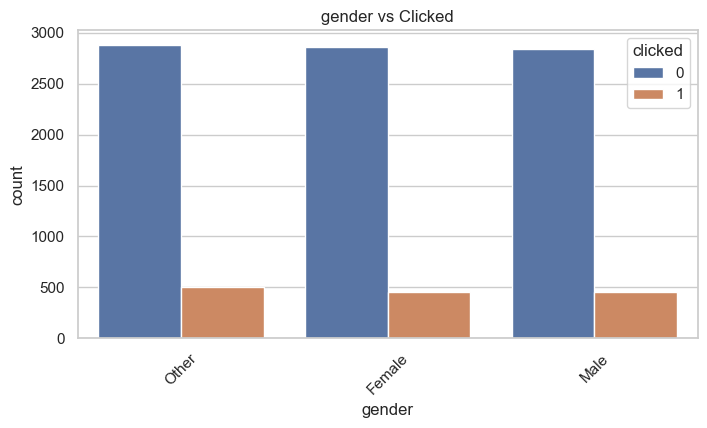

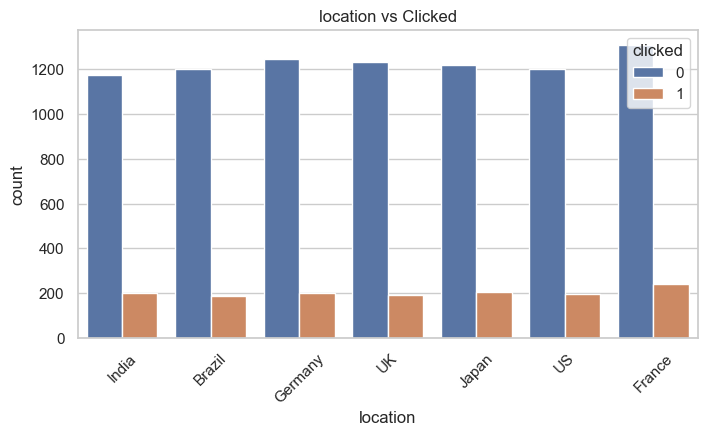

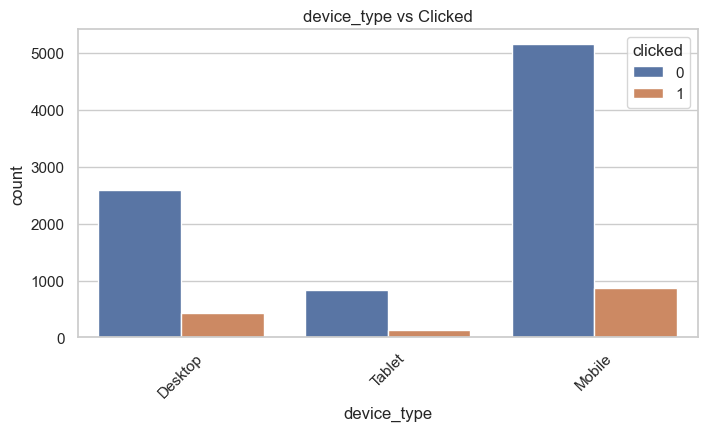

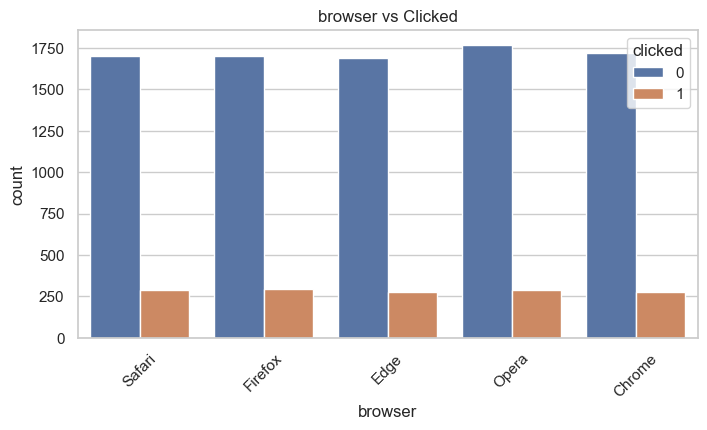

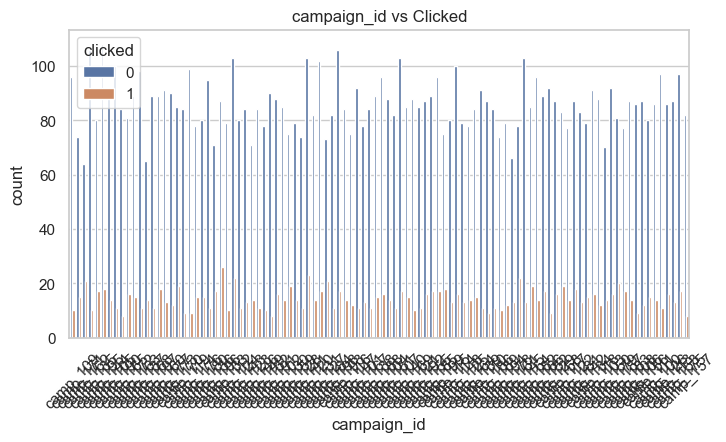

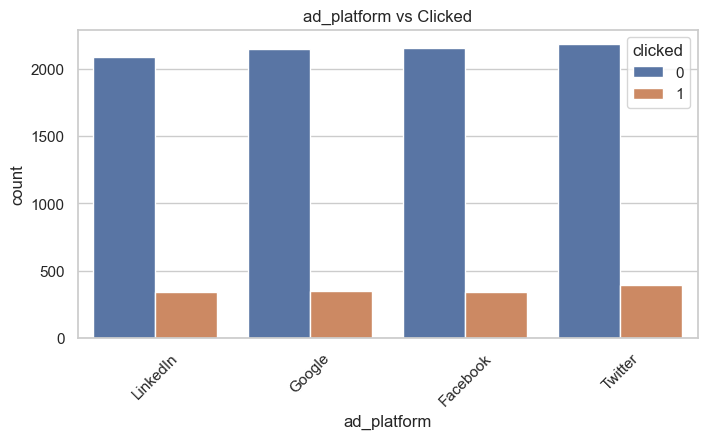

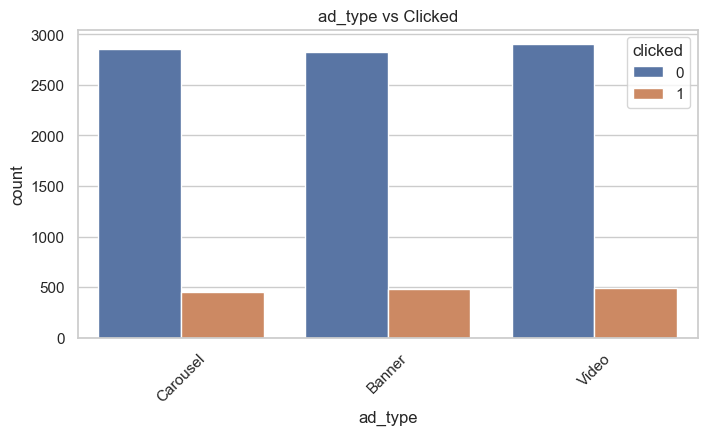

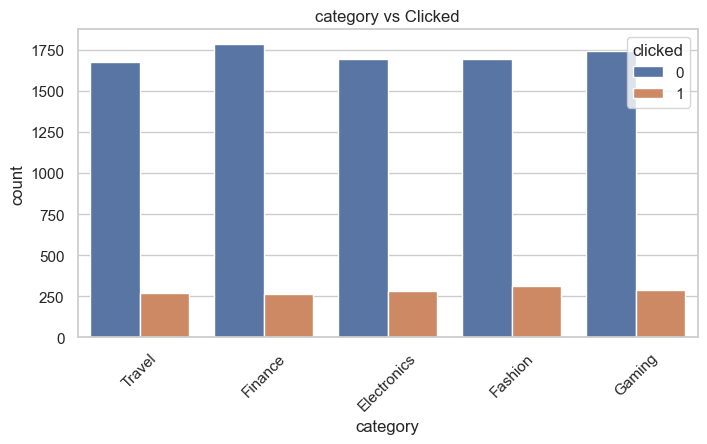

In [25]:

# Numerical vs Target
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='clicked', y=col)
    plt.title(f'{col} vs Clicked')
    plt.show()

# Categorical vs Target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='clicked')
    plt.title(f'{col} vs Clicked')
    plt.xticks(rotation=45)
    plt.show()


## 📊 Step 5: Multivariate Analysis

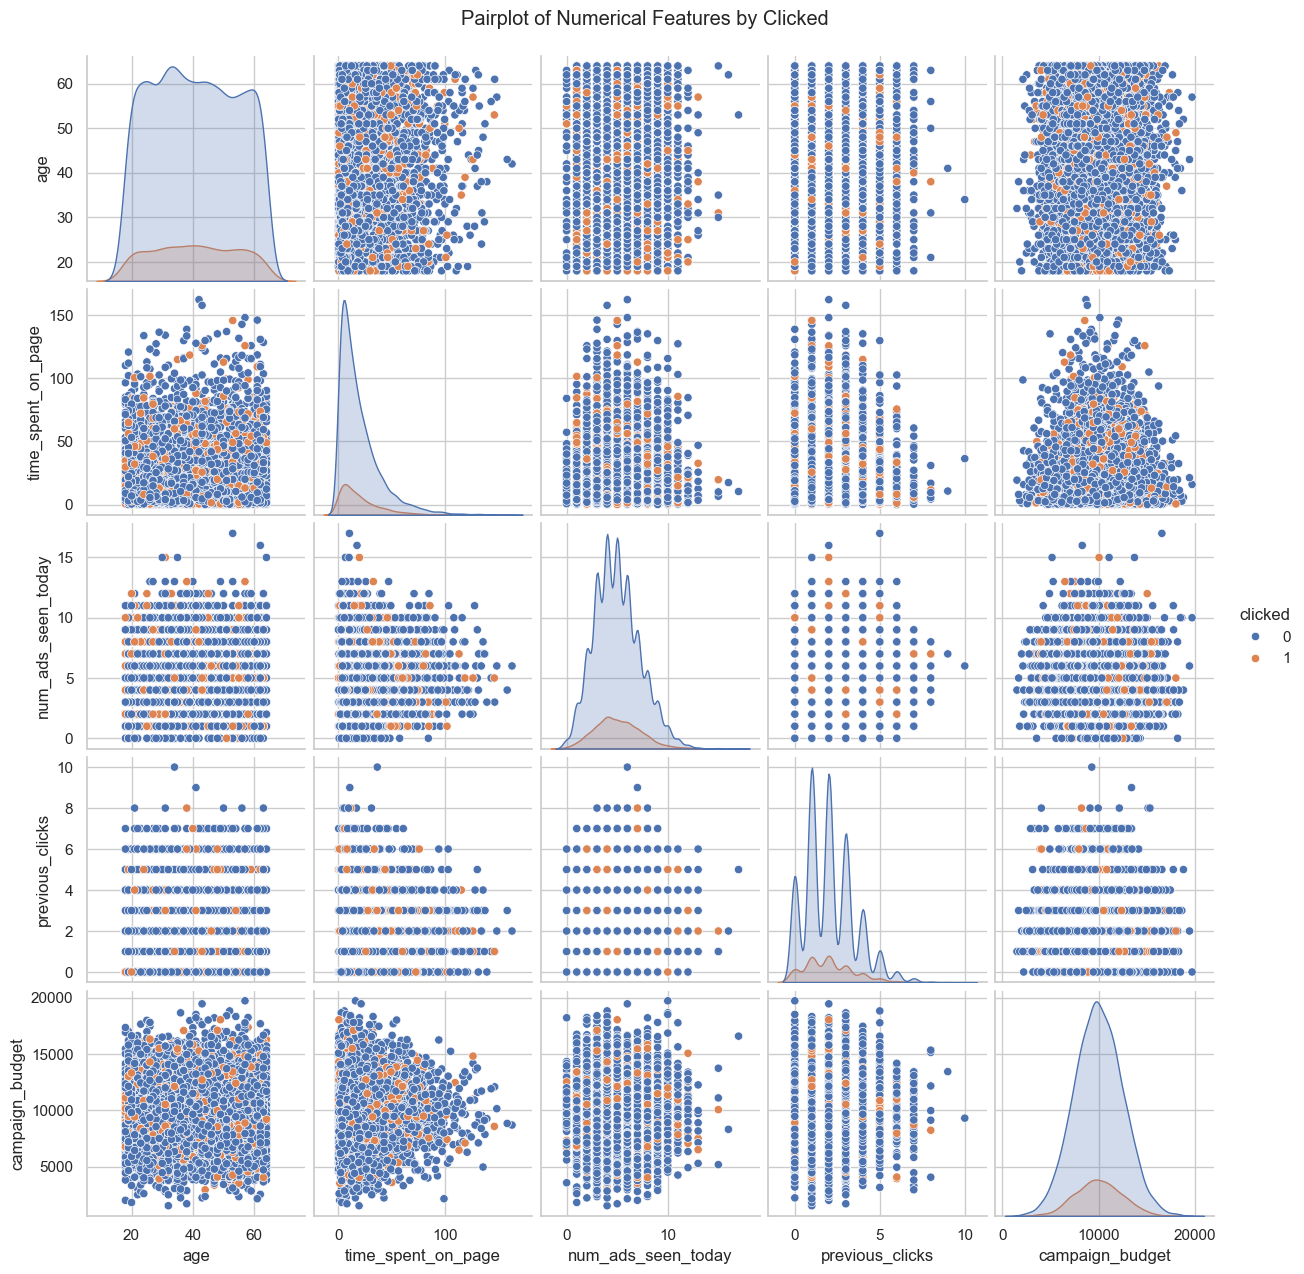

In [26]:

sns.pairplot(df[numerical_cols.tolist() + ['clicked']], hue='clicked')
plt.suptitle("Pairplot of Numerical Features by Clicked", y=1.02)
plt.show()


## ❓ Step 6: Missing Value Analysis

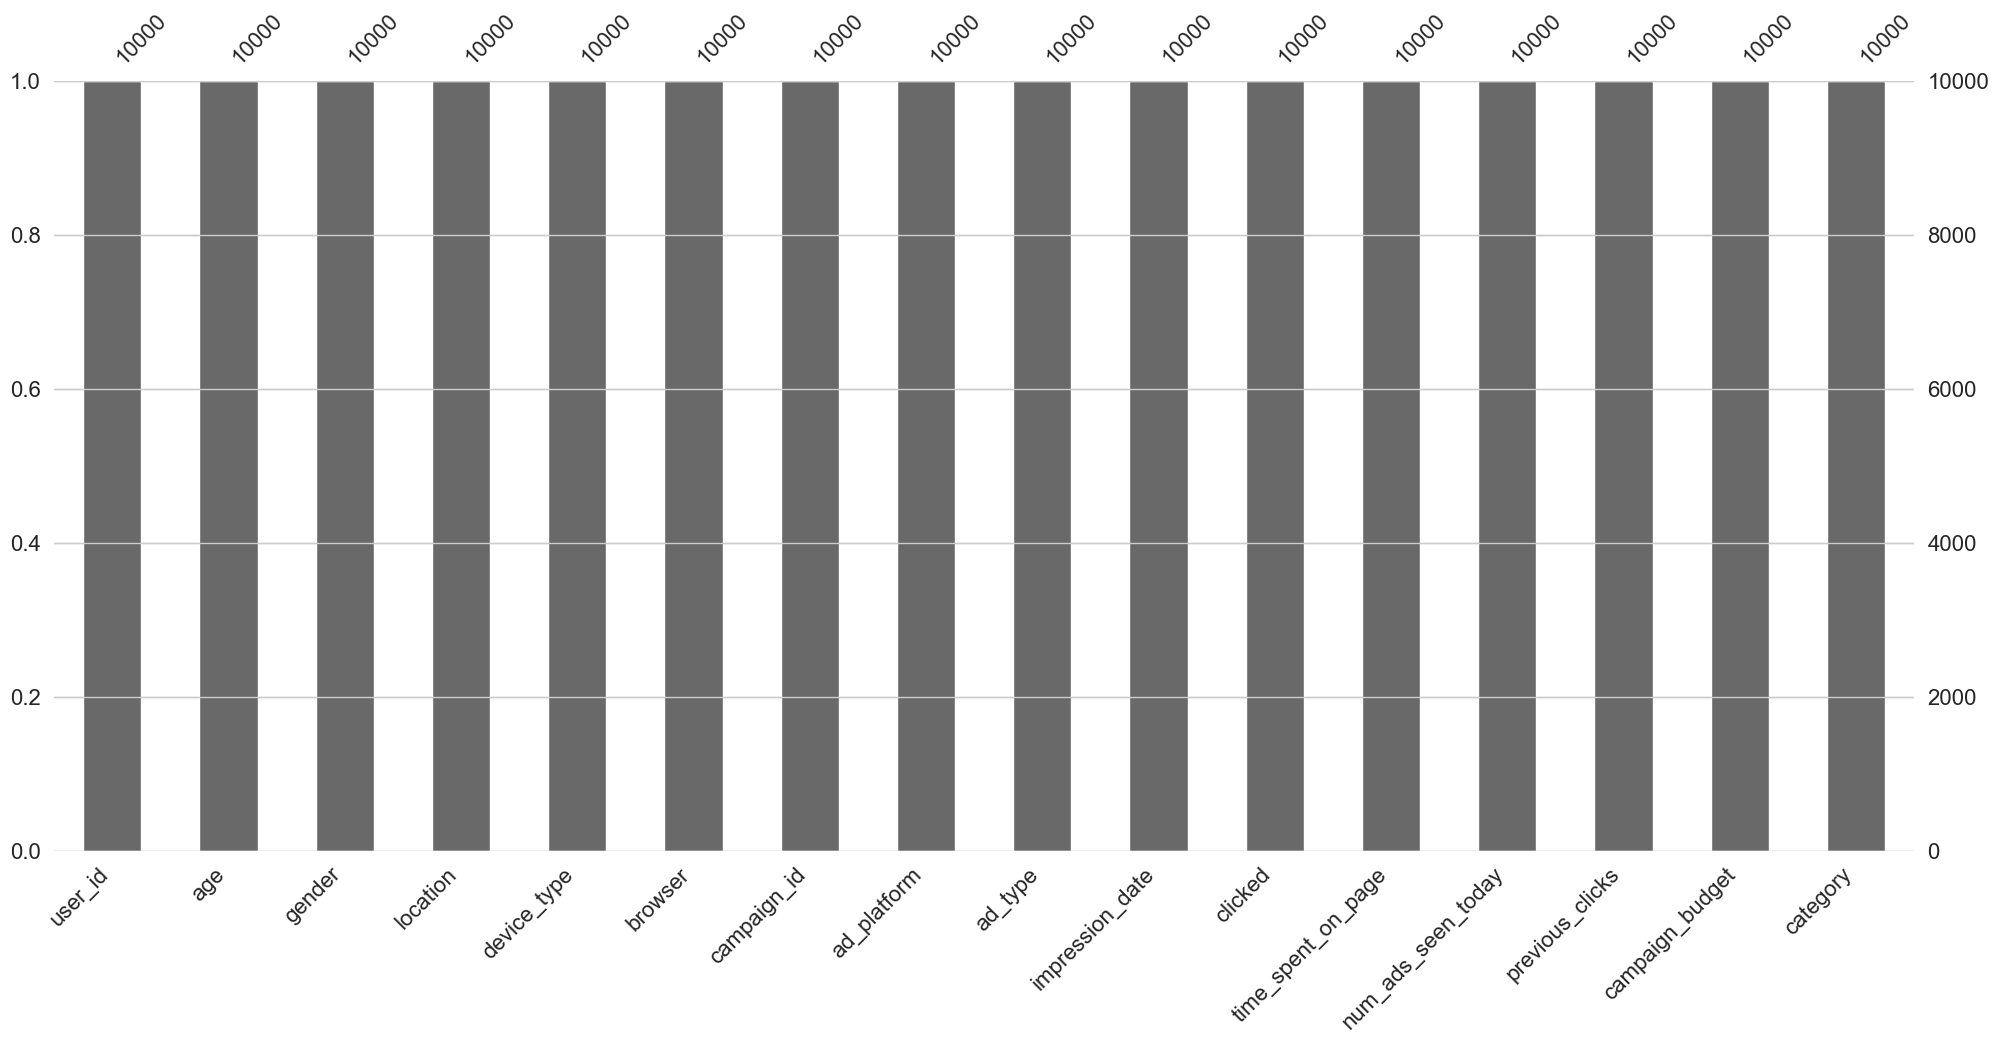

Series([], dtype: int64)

In [27]:

import missingno as msno
msno.bar(df)
plt.show()

missing = df.isnull().sum()
missing[missing > 0]


## 🚨 Step 7: Outlier Detection

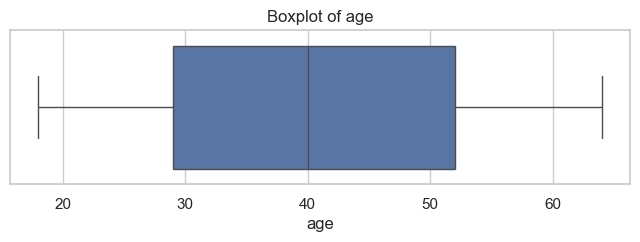

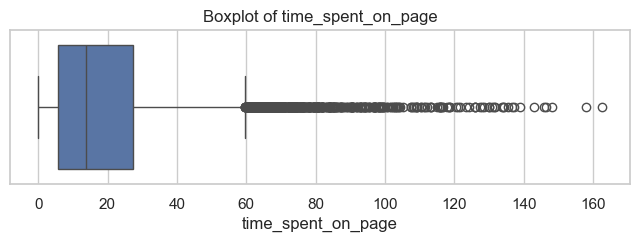

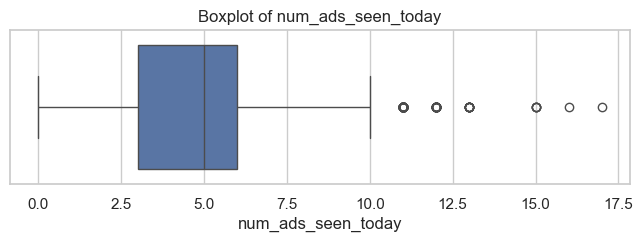

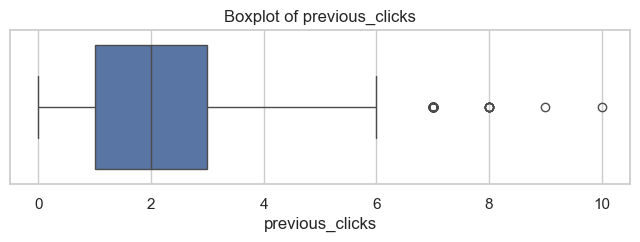

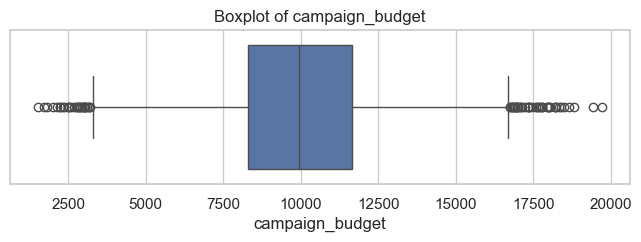

In [28]:

for col in numerical_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 🔄 Step 8: Skewness & Transformation

In [29]:

from scipy.stats import skew
import numpy as np

skew_vals = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print(skew_vals)

# Apply log1p to skewed columns
for col in skew_vals[skew_vals > 1].index:
    df[f'{col}_log'] = np.log1p(df[col])


age                   0.037687
time_spent_on_page    2.000103
num_ads_seen_today    0.451524
previous_clicks       0.705778
campaign_budget       0.058401
dtype: float64


## 🎯 Step 9: Target Analysis

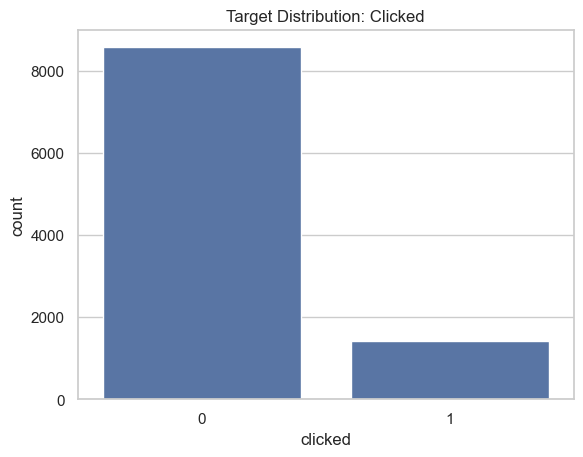

In [30]:

sns.countplot(x='clicked', data=df)
plt.title('Target Distribution: Clicked')
plt.show()


## 🔗 Step 10: Correlation Analysis

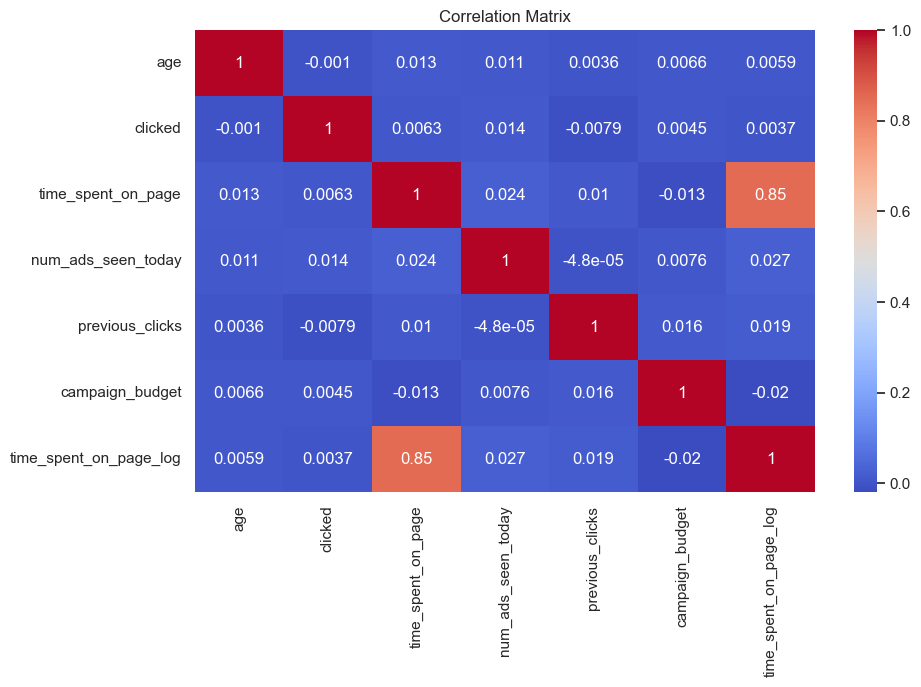

In [31]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## ⚖️ Step 11: Class Imbalance

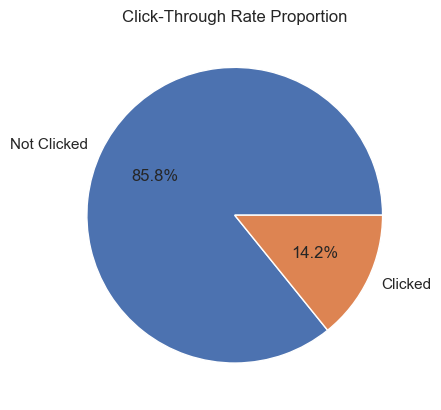

In [32]:

df['clicked'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['Not Clicked', 'Clicked'])
plt.title("Click-Through Rate Proportion")
plt.ylabel("")
plt.show()


## 🔢 Step 12: Cardinality Check

In [33]:

df[categorical_cols].nunique().sort_values(ascending=False)


user_id        2889
campaign_id     100
location          7
browser           5
category          5
ad_platform       4
gender            3
device_type       3
ad_type           3
dtype: int64

## 🧼 Step 13: Data Quality Check

In [34]:

print("Duplicate Rows:", df.duplicated().sum())
zero_var = [col for col in df.columns if df[col].nunique() <= 1]
print("Zero-variance Columns:", zero_var)


Duplicate Rows: 0
Zero-variance Columns: []


## ⏱️ Step 14: Time Series Profiling

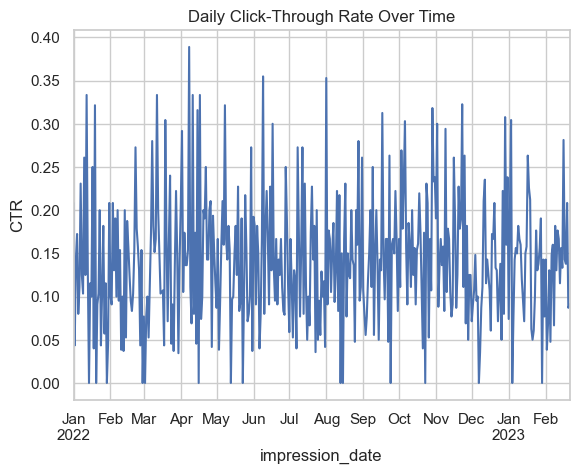

In [35]:

df.set_index('impression_date').resample('D')['clicked'].mean().plot()
plt.title("Daily Click-Through Rate Over Time")
plt.ylabel("CTR")
plt.show()


## 🧩 Step 15: Multicollinearity

In [36]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()
X = add_constant(X)
pd.DataFrame({
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    "Feature": X.columns
})


,VIF,Feature
0,33.200420,const
1,1.000345,age
2,1.001032,time_spent_on_page
3,1.000764,num_ads_seen_today
4,1.000383,previous_clicks
5,1.000531,campaign_budget


## 🔁 Step 16: Interaction Effects

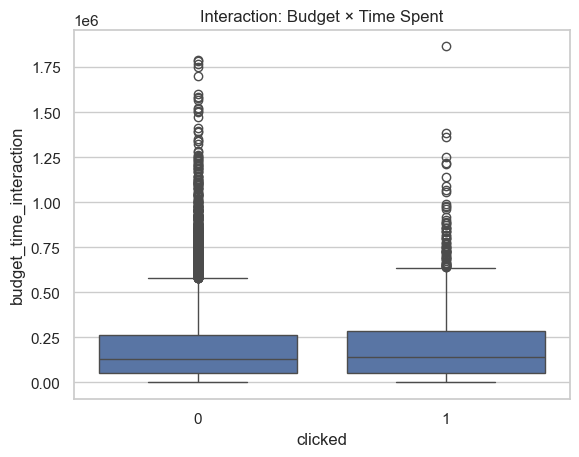

In [37]:

df['budget_time_interaction'] = df['campaign_budget'] * df['time_spent_on_page']
sns.boxplot(x='clicked', y='budget_time_interaction', data=df)
plt.title("Interaction: Budget × Time Spent")
plt.show()


## 🧯 Step 17: Data Leakage Check

In [38]:

df.corr(numeric_only=True)['clicked'].sort_values(ascending=False)


clicked                    1.000000
num_ads_seen_today         0.013995
budget_time_interaction    0.009115
time_spent_on_page         0.006266
campaign_budget            0.004480
time_spent_on_page_log     0.003682
age                       -0.001034
previous_clicks           -0.007906
Name: clicked, dtype: float64

## 🛠️ Step 18: Feature Engineering Hints

In [39]:

df['avg_ads_per_hour'] = df['num_ads_seen_today'] / 24
df['click_rate_prior'] = df['previous_clicks'] / (df['num_ads_seen_today'] + 1)
df[['avg_ads_per_hour', 'click_rate_prior']].describe()


,avg_ads_per_hour,click_rate_prior
count,10000.000000,10000.000000
mean,0.207467,0.406634
std,0.093446,0.396444
min,0.000000,0.000000
25%,0.125000,0.166667
50%,0.208333,0.333333
75%,0.250000,0.500000
max,0.708333,6.000000


## 🔍 Step 19: Clustering Patterns

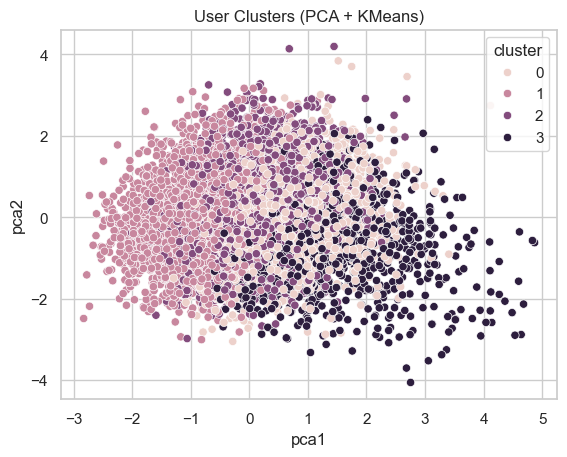

In [40]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaled = StandardScaler().fit_transform(df[numerical_cols])
pca = PCA(n_components=2).fit_transform(scaled)
df['pca1'], df['pca2'] = pca[:, 0], pca[:, 1]
df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(scaled)

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster')
plt.title("User Clusters (PCA + KMeans)")
plt.show()


## 🤖 Step 20: AutoEDA Tools

In [41]:

# !pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Ad Click AutoEDA Report", explorative=True)
profile.to_file("adclick_autoeda_report.html")


Summarize dataset:  83%|████████▎ | 25/30 [00:00<00:00, 92.14it/s, Calculate auto correlation]/Users/anirudhyadav/anaconda3/envs/agentic_ai_rag/lib/python3.10/site-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 3 ... 3 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 113.58it/s]


## 📐 Step 21: Statistical EDA

In [42]:

from scipy.stats import ttest_ind, chi2_contingency

# T-Test on time_spent_on_page
t_stat, p_val = ttest_ind(df[df['clicked'] == 0]['time_spent_on_page'],
                          df[df['clicked'] == 1]['time_spent_on_page'])
print(f"T-Test on Time Spent: t={t_stat:.2f}, p={p_val:.3f}")

# Chi-square on ad_type
cont = pd.crosstab(df['ad_type'], df['clicked'])
chi2, p, dof, _ = chi2_contingency(cont)
print(f"Chi-Square on Ad Type: chi2={chi2:.2f}, p={p:.3f}")


T-Test on Time Spent: t=-0.63, p=0.531
Chi-Square on Ad Type: chi2=1.22, p=0.543
